<a href="https://colab.research.google.com/github/purplepatch-everyday/Projects_in_Python/blob/main/sklearn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np

Load Iris data

In [2]:
iris = datasets.load_iris()

In [12]:
# get row
len(iris.data)

150

In [13]:
# get column
len(iris.data[0])

4

In [18]:
X = iris.data[:,[2,3]]
print(len(X))
y = iris.target
print(y)
print("클래스 레이블: ", np.unique(y))

150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
클래스 레이블:  [0 1 2]


Split train, test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 1, stratify = y)

In [20]:
print("y 레이블 카운트", np.bincount(y))

y 레이블 카운트 [50 50 50]


In [21]:
print("y train 레이블 카운트", np.bincount(y_train))

y train 레이블 카운트 [35 35 35]


In [22]:
print("y test 레이블 카운트", np.bincount(y_test))

y test 레이블 카운트 [15 15 15]


Scaler 적용하기

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [25]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

linear model 만들기

In [26]:
from sklearn.linear_model import Perceptron

In [28]:
ppn = Perceptron(max_iter = 40,eta0=0.1,tol = 1e-3, random_state =1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [35]:
y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %0.1f" % sum(y_test != y_pred))

잘못 분류된 샘플 개수: 1.0


metrics로 분석하기


In [33]:
from sklearn.metrics import accuracy_score
print("정확도: %.2f" % accuracy_score(y_test,y_pred))

정확도: 0.98


시각화 하기

In [40]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [54]:
def plot_decision_regions(X,y,classifier,test_idx = None, resolution = 0.02):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
  x2_min,x2_max = X[:,1].min()-1,X[:,0].max()+1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape (xx1.shape)

  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  for idx,cl in enumerate (np.unique(y)):
    plt.scatter(x=X[y==cl,0],y =X[y==cl,1],
                alpha = 0.8, c= colors[idx],
                marker = markers[idx], label = cl,
                edgecolor = 'black')

  if test_idx:
    X_test, y_test = X[test_idx,:], y[test_idx]

    plt.scatter(X_test[:,0], X_test[:,1],
                c='none',edgecolor = 'black', alpha = 1.0,
                s = 100, label = 'test set ')


<ipython-input-54-9c93b109689d>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y =X[y==cl,1],


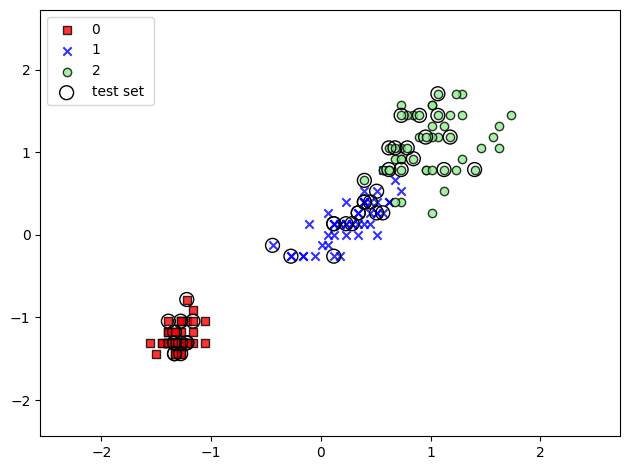

In [55]:

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                      y = y_combined,
                      classifier = ppn,
                      test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()